In [6]:
import pandas as pd
import glob
import os

# Specify the directory where the CSV files are located
directory = '../../data/scdesign3_output'

# Use glob to get all CSV files in the directory
csv_files = glob.glob(os.path.join(directory, "*.csv"))

# Initialize an empty DataFrame to hold the concatenated result
combined_df = pd.DataFrame()

# Loop over the list of CSV files and read each into a DataFrame
for file in csv_files:
    df = pd.read_csv(file, index_col=0)  # Set the index column
    file_name = os.path.splitext(os.path.basename(file))[0]  # Get the file name without extension
    #print(file_name)
    df.columns = [file_name]  # Rename the column to the file name
    combined_df = pd.concat([combined_df, df], axis=1)
# Display the combined DataFrame
combined_df

,zinb_fit,gaussian_fit,poisson_fit,zip_fit,nb_fit
microbe,,,,,
PWY-7238: sucrose biosynthesis II,182901.686934,202306.094779,inf,6.428933e+06,182901.686934
PWY-1042: glycolysis IV,178304.807141,201929.953157,inf,3.015312e+06,178304.807141
GLYCOGENSYNTH-PWY: glycogen biosynthesis I (from ADP-D-Glucose),181202.942507,198935.553005,inf,6.170639e+06,181202.942507
VALSYN-PWY: L-valine biosynthesis,172518.899336,199203.710482,inf,2.198660e+06,172518.899336
ILEUSYN-PWY: L-isoleucine biosynthesis I (from threonine),170953.105496,198052.080174,inf,2.016131e+06,170953.105496
...,...,...,...,...,...
PWY-7000: kanamycin biosynthesis,31118.984249,98411.437841,inf,8.319184e+04,31118.984249
PWY-7723: bacterial bioluminescence,18357.335589,95546.336804,inf,5.486879e+04,18357.335589
PWY-7805: (aminomethyl)phosphonate degradation,34475.458671,110682.099998,inf,1.824100e+05,34475.458671


/tmp/ipykernel_1063157/3928990996.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=melted_df, x='Distribution', y='AIC Value', palette='muted', inner='quartile')


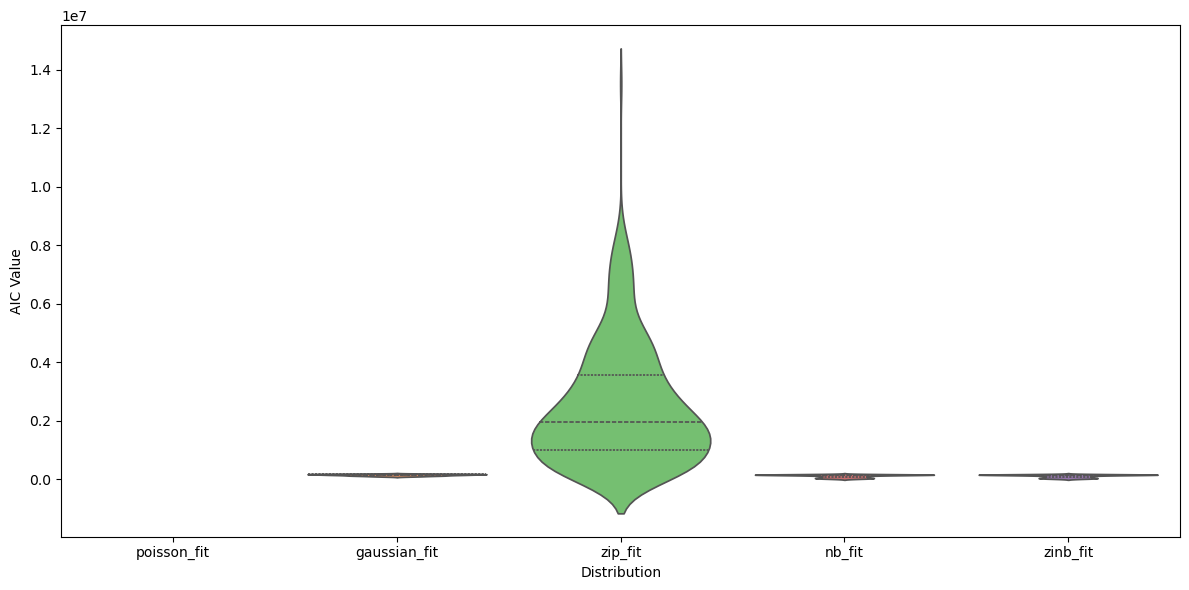

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select the distributions to plot
dists = ['poisson_fit', 'gaussian_fit', 'zip_fit', 'nb_fit', 'zinb_fit']

# Melt the DataFrame for violin plot compatibility
melted_df = combined_df[dists].melt(var_name='Distribution', value_name='AIC Value')

# Create the violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=melted_df, x='Distribution', y='AIC Value', palette='muted', inner='quartile')

# Add labels and title
plt.xlabel('Distribution')
plt.ylabel('AIC Value')
#plt.title('Violin Plot of AIC Values for Each Distribution')
plt.tight_layout()

# Save the plot
plt.savefig('../../figures/exp02/2_figures/S4A_all_dist_fit_violin.pdf', 
            format='pdf', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


/tmp/ipykernel_1063157/870707031.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=melted_df, x='Distribution', y='AIC Value', palette='muted', inner='quartile')


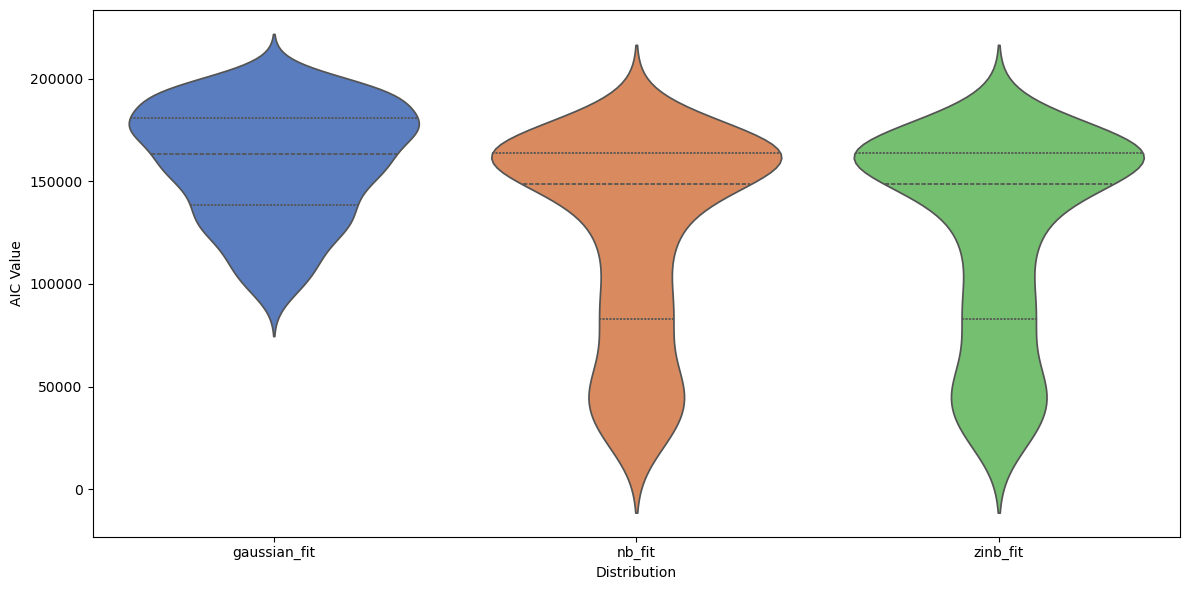

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select the distributions to plot
dists = ['gaussian_fit', 'nb_fit', 'zinb_fit']

# Melt the DataFrame for violin plot compatibility
melted_df = combined_df[dists].melt(var_name='Distribution', value_name='AIC Value')

# Create the violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=melted_df, x='Distribution', y='AIC Value', palette='muted', inner='quartile')

# Add labels and title
plt.xlabel('Distribution')
plt.ylabel('AIC Value')
#plt.title('Violin Plot of AIC Values for Each Distribution')
plt.tight_layout()

# Save the plot
plt.savefig('../../figures/exp02/2_figures/S4B_nb_zinb_guassian_aic_violin.pdf', 
            format='pdf', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
